In [21]:
library(ggplot2);
library(plyr);
library(dplyr);
library(Hmisc);
library(broom);
library(xts);
library(lubridate)
library(cluster)
library(zoo)
library(magrittr)
options(warn=-1)

Upload the data file for feature engineering

In [2]:
gaming_accesory <- read.csv("gaming_accesory")
camera_accesory <- read.csv("CameraAccessory")
home_audio      <- read.csv("home_audio")

In [3]:
camera_accesory

fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,⋯,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,week_year,week_month,date
ACCCX3S58G7B5F6P,2015-10-17,2015,10,3.419301e+15,3.419301e+15,6400,1,0,0,⋯,-7.791756e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42,3,2015-10-17
ACCCX3S58G7B5F6P,2015-10-19,2015,10,1.420831e+15,1.420831e+15,6900,1,0,0,⋯,7.335411e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42,3,2015-10-19
ACCCX3S5AHMF55FV,2015-10-20,2015,10,2.421913e+15,2.421913e+15,1990,1,0,0,⋯,-7.477688e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,3,2015-10-20
ACCCX3S5AHMF55FV,2015-10-14,2015,10,4.416592e+15,4.416592e+15,1690,1,0,0,⋯,-5.835932e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,41,2,2015-10-14
ACCCX3S5AHMF55FV,2015-10-17,2015,10,4.419525e+15,4.419525e+15,1618,1,0,0,⋯,5.347354e+17,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,3,2015-10-17
ACCCX3S5JGAJETYR,2015-10-17,2015,10,3.419189e+15,3.419189e+15,3324,1,0,0,⋯,-1.919053e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,42,3,2015-10-17
ACCCX3S5JGAJETYR,2015-10-16,2015,10,3.418429e+15,3.418429e+15,3695,1,0,0,⋯,6.404913e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,42,3,2015-10-16
ACCCX3S5JGAJETYR,2015-10-15,2015,10,3.417799e+15,3.417799e+15,3695,1,0,0,⋯,-1.606303e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,42,3,2015-10-15
ACCCX3S5JGAJETYR,2015-10-25,2015,10,4.426482e+15,4.426482e+15,3695,1,0,0,⋯,-9.779010e+17,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,43,4,2015-10-25
ACCCX3S5JGAJETYR,2015-10-19,2015,10,2.420829e+15,2.420829e+15,3695,1,0,0,⋯,7.335411e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,42,3,2015-10-19


### Feature Engineering

In [4]:
# KPI Function
KPI_FN <- function(dataset){
    ##1.Adstock Data 
    advertisement <- read.csv("advertisement.csv")
    adstock <- subset(advertisement, select=c(-Total.Investment))    
    #Dividing by 4.29 
    for( i in 3:ncol(adstock)){
        adstock[,i] = adstock[,i]/(4.29)
    }  
    merge(dataset, adstock, by=c("Year","Month"), all.x = TRUE)
    dataset[is.na(dataset)] <- 0
    ##2.Discount
    dataset$list_price = dataset$gmv/dataset$units
    #Discount = List Price - Discount
    dataset$promotional_offer = (dataset$product_mrp - dataset$list_price)/dataset$product_mrp
    ##3.Payment Model Indicator
    dataset$order_pay_id <- ifelse(dataset$s1_fact.order_payment_type   == "Prepaid",1,0)
    
    ##4.Prepaid Order %
    #Total Order Placed
    total_order <-aggregate(order_pay_id ~ Year+Month+week_year,data=dataset, FUN=NROW)
    #Total Online Order 
    online_order <- aggregate(order_pay_id~Year+Month+week_year, data= dataset, FUN=sum)
    #merge both the files
    merged <- merge(total_order,online_order,by=c("Month", "Year", "week_year"),all.x=TRUE)
    #calculating per online order  
    merged$per_order <- merged$order_pay_id.y / merged$order_pay_id.x
    #remove other variabled from 
    #merge with dataset file    
    merged <- merged[,-c(4,5)]
    #add per_order in dataset file
    dataset <- merge(dataset, merged, by=c("Month", "Year", "week_year"),all.x=TRUE)  
    dataset[is.na(dataset)] <- 0
    ##5.Brand Perception - Product Category
    dataset$product_analytic_vertical <- factor(dataset$product_analytic_vertical) 
    cluster <- aggregate(cbind(units,list_price,product_mrp)~product_analytic_vertical,dataset,mean)
    if(nrow(cluster) >2){
        cluster$list_price_1 <- scale(cluster$list_price)
        cluster$product_mrp_1 <- scale(cluster$product_mrp)
        cluster$units_1 <- scale(cluster$units)
        k1 <- cluster[,-c(2:4)]
      
        clust <- kmeans(k1[-1], centers=3,iter.max=50,nstart=50) 
        cluster$P_tag <- as.factor(clust$cluster)
        cluster <- cluster[,c(1,8)]        
    #   add extra column in dataset
        dataset <- merge(dataset,cluster,by=c("product_analytic_vertical"), all.x=TRUE)
        library("plyr")
        library("dplyr")
    
        k2 <- table(dataset$P_tag)
    
        levels(dataset$P_tag)[which(k2==max(table(dataset$P_tag)))] <- "Mass_p"
        levels(dataset$P_tag)[which(k2==min(table(dataset$P_tag)))] <- "Premium_p"
        levels(dataset$P_tag)[which(k2!=max(table(dataset$P_tag))& k2!=min(table(dataset$P_tag)))] <- "Middle_p"
       }
    else 
    {
        dataset$P_tag <- NA
        dataset$product_analytic_vertical <- factor(dataset$product_analytic_vertical) 
        if(tapply(dataset$product_mrp, dataset$product_analytic_vertical,mean)[[1]] > (tapply(dataset$product_mrp,dataset$product_analytic_vertical,mean)[[2]]))
        {
            dataset$P_tag[which(dataset$product_analytic_vertical == levels(dataset$product_analytic_vertical)[1])] <- "middle"
            dataset$P_tag[is.na(dataset$P_tag)] <- "mass"
        }
        else
        {
            dataset$P_tag[which(dataset$product_analytic_vertical == levels(dataset$product_analytic_vertical)[2])] <- "middle"
            dataset$P_tag[is.na(dataset$P_tag)] <- "mass"
        }
    }
    count <- table(dataset$P_tag)
    barplot(count, main= "Brand Perception",xlab="Type of Product for Market")
     
    ##6. NPS_Score
        nps <-read.csv('nps.csv',h=T)
        nps$Month <- as.character(nps$Month)
        dataset <- merge(dataset,nps,by=c("Month","Year"),all.x=TRUE)
    
    ##7. Total Investment across all Channels
        inv <- advertisement
        inv$Month <- as.character(inv$Month)
        inv$Year  <- as.character(inv$Year)
        dataset <- merge(dataset,inv,by=c("Month","Year"),all.x=TRUE)
    
    ##8. Holiday Effect 
    
        holiday_list<-c("2015-07-18","2015-07-19","2015-08-15",
                  "2015-08-16","2015-08-17","2015-08-28",
                  "2015-08-29","2015-08-30","2015-10-15",
                  "2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09","2015-11-10",
                  "2015-10-11","2015-10-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26",
                  "2015-12-27","2015-12-28","2015-12-29","2015-12-30","2016-01-01","2016-01-02",
                  "2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02",
                  "2016-02-20","2016-02-21","2016-02-14","2016-02-15","2016-03-07","2016-03-08",
                  "2016-03-09","2016-05-25","2016-05-26","2016-05-27")
        
        holiday_list <- as.Date(holiday_list)
        week_year <- week(holiday_list)
        year <- year(holiday_list)
        holiday_data <- data.frame(cbind(year,week_year))
        holiday_data$holiday_list <- holiday_list
        holiday_data$number <- 1
        holiday_data <- aggregate(number~year+week_year,holiday_data, sum)
        write.csv(holiday_data,"holiday_data.csv",row.names=F)
        
        dataset$paste <-paste(dataset$Year, dataset$week_year, sep='_')
        products <- as.data.frame.matrix(t(table(dataset$P_tag,dataset$week_year)))
        products$week_year <- row.names(products)
    
        holiday_data$paste <-paste(holiday_data$year, holiday_data$week_year, sep='_')
        holiday_data <- holiday_data[,-c(1:2)]
        dataset <- merge(dataset, holiday_data, by=c("paste"),all.x=TRUE)
    
        dataset$number[is.na(dataset$number)] <- 0
        dataset <- aggregate(cbind(list_price,product_mrp,gmv,units,sla,promotional_offer,number,Total.Investment,TV,Digital,Sponsorship,Content.Marketing,Online.marketing,Affiliates,SEM,product_procurement_sla,per_order,NPS)~week_year,data=dataset,FUN=mean)   
        dataset <- merge(dataset,products,by=c("week_year"),all.x=TRUE)
        
    return(dataset)
}


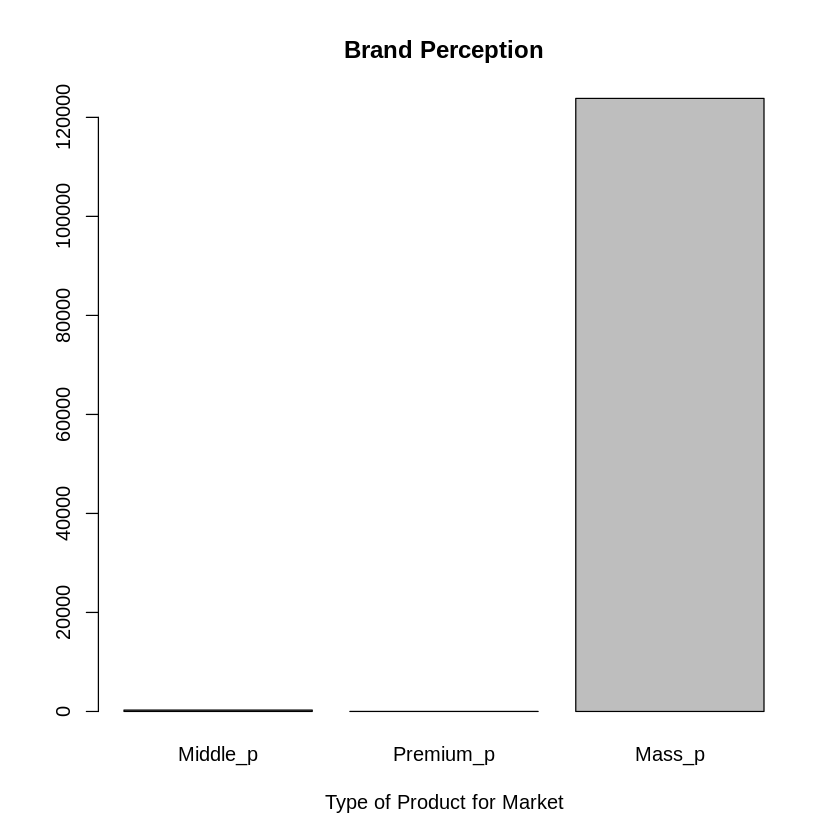

In [5]:
home_audio_FE <- KPI_FN(home_audio)


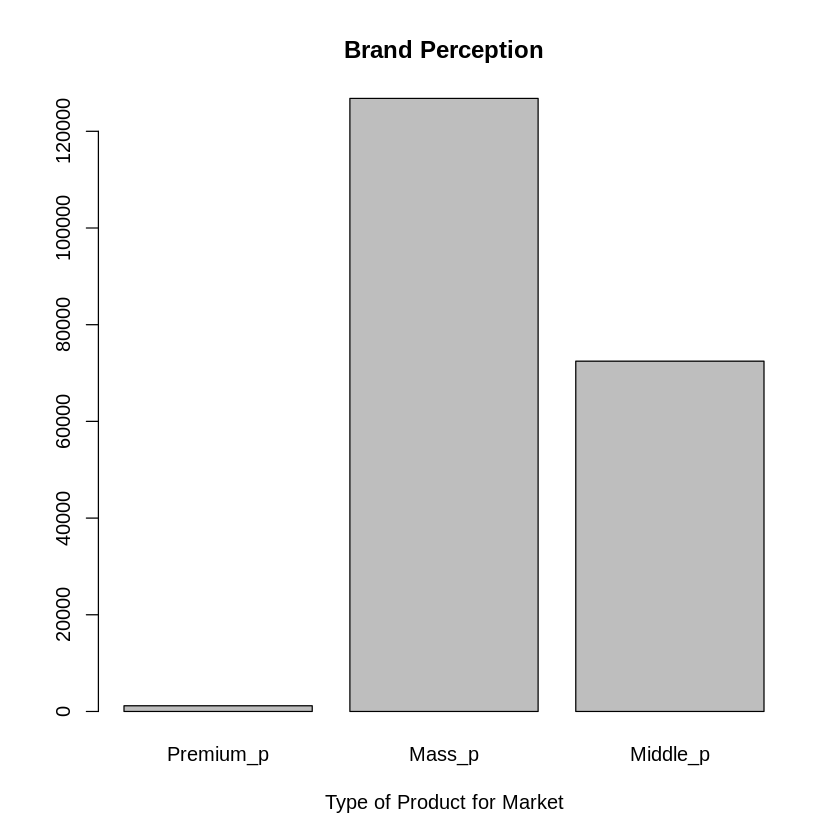

In [6]:
gaming_accesory_FE <- KPI_FN(gaming_accesory)


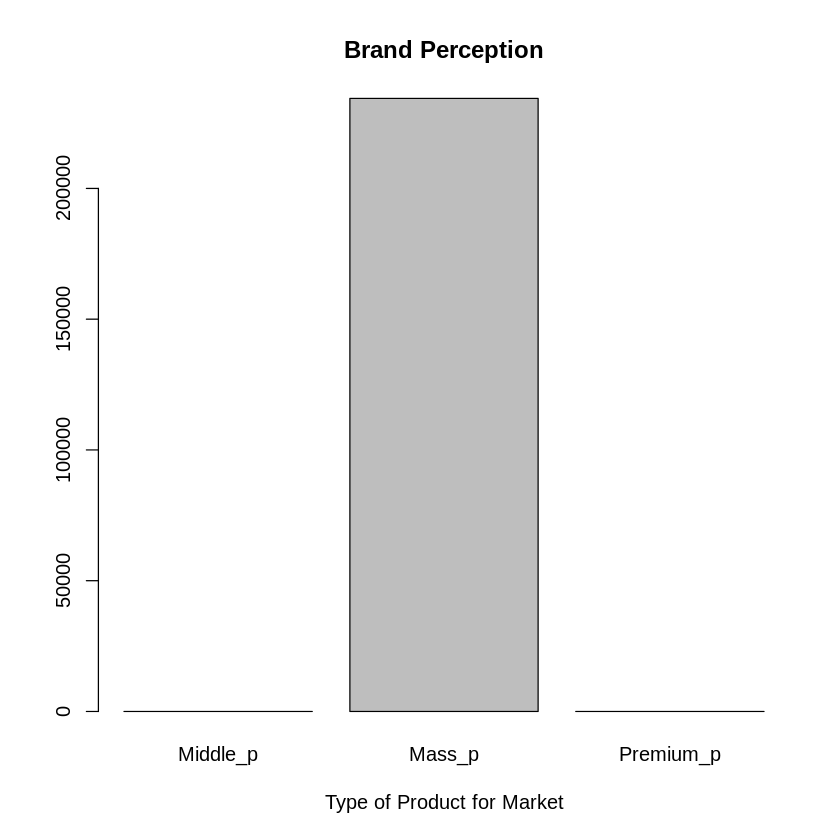

In [7]:
camera_accesory_FE <- KPI_FN(camera_accesory)

#### Price Inflation Factor

Creating Moving Averages Variables

In [8]:
summary(camera_accesory_FE)

   week_year       list_price    product_mrp          gmv           units      
 Min.   : 1.00   Min.   : 299   Min.   : 829.6   Min.   : 299   Min.   :1.000  
 1st Qu.:13.75   1st Qu.:1056   1st Qu.:1987.0   1st Qu.:1066   1st Qu.:1.016  
 Median :26.50   Median :1193   Median :2239.5   Median :1205   Median :1.019  
 Mean   :26.87   Mean   :1194   Mean   :2198.3   Mean   :1205   Mean   :1.020  
 3rd Qu.:40.25   3rd Qu.:1345   3rd Qu.:2438.7   3rd Qu.:1361   3rd Qu.:1.023  
 Max.   :53.00   Max.   :1652   Max.   :2780.2   Max.   :1660   Max.   :1.034  
      sla        promotional_offer     number       Total.Investment
 Min.   :5.393   Min.   :0.03354   Min.   :0.0000   Min.   :  5.10  
 1st Qu.:5.832   1st Qu.:0.43925   1st Qu.:0.0000   1st Qu.: 48.10  
 Median :6.128   Median :0.47332   Median :0.0000   Median : 73.48  
 Mean   :6.184   Mean   :0.47756   Mean   :0.8269   Mean   : 74.20  
 3rd Qu.:6.380   3rd Qu.:0.52215   3rd Qu.:2.0000   3rd Qu.:100.00  
 Max.   :8.400   Max.   :0

In [9]:
advanced_kpi <- function(dataset){
  library(dplyr)
  library(zoo)
  
  myfun1 = function(x) rollmean(x, k = 2, fill = NA, align = "right")
  myfun2 = function(x) rollmean(x, k = 3, fill = NA, align = "right")
  myfun3 = function(x) rollmean(x, k = 4, fill = NA, align = "right")
  
  #dataset1<-arrange(dataset1,P_analytic_vertical,Year,week_year)
  
  x=dataset[,c("week_year","list_price","promotional_offer")]
  
  
  x1<-x %>% mutate_each(funs(myfun1),list_price,promotional_offer) %>% data.frame()
  
  x2<-x %>% mutate_each(funs(myfun2),list_price,promotional_offer) %>% data.frame()
  
  x3<-x %>% mutate_each(funs(myfun3),list_price,promotional_offer) %>% data.frame()
  
  
  x1$LP_MA1<-(x1$list_price)
  x1$PO_MA1<-(x1$promotional_offer)
  
  x2$LP_MA2<-(x2$list_price)
  x2$PO_MA2<-(x2$promotional_offer)
  
  x3$LP_MA3<-(x3$list_price)
  x3$PO_MA3<-(x3$promotional_offer)
  
  x4=cbind(x1[,-c(2:3)],x2[,-c(1:3)],x3[,-c(1:3)])
  
  
  dataset<-merge(dataset,x4,by="week_year")
    
  dataset$inc_LP_MA1<-(dataset$list_price - dataset$LP_MA1)/dataset$LP_MA1
  dataset$inc_LP_MA2<-(dataset$list_price - dataset$LP_MA2)/dataset$LP_MA2
  dataset$inc_LP_MA3<-(dataset$list_price - dataset$LP_MA3)/dataset$LP_MA3
  
  dataset$inc_PO_MA1<-(dataset$promotional_offer - dataset$PO_MA1)/dataset$PO_MA1
  dataset$inc_PO_MA2<-(dataset$promotional_offer - dataset$PO_MA2)/dataset$PO_MA2
  dataset$inc_PO_MA3<-(dataset$promotional_offer - dataset$PO_MA3)/dataset$PO_MA3
  
  #Deleting some columns
  
  dataset$LP_MA1<-NULL
  dataset$LP_MA2<-NULL
  dataset$LP_MA3<-NULL
  
  dataset$PO_MA1<-NULL
  dataset$PO_MA2<-NULL
  dataset$PO_MA3<-NULL
  print(summary(dataset))
  names(dataset)[23:28]<-c("inc_LP_MA1","inc_LP_MA2","inc_LP_MA3","inc_PO_MA1","inc_PO_MA2",
                           "inc_PO_MA3")
   print(summary(dataset))  
  #------1) Lag of List price by 1 week,2 week, 3 week
  #------2) Lag of discount(promo_off) by 1 week,2 week, 3 week
  #------3) Incremental Lag of List price & promotions/discounts by 1 week,2 week, 3 week
  
  #-----------------Lag the data after aggregating by week----#
  
  #8. Lag List price (different period lags)
  library(DataCombine)
  
  data_dum <- slide(dataset,Var="list_price",slideBy=-1)
  data_dum <- slide(data_dum,Var="list_price",slideBy=-2)
  data_dum <- slide(data_dum,Var="list_price",slideBy=-3)
    
  data_dum <- slide(data_dum,Var="promotional_offer",slideBy=-1)
  data_dum <- slide(data_dum,Var="promotional_offer",slideBy=-2)
  data_dum <- slide(data_dum,Var="promotional_offer",slideBy=-3)

  data_dum <- slide(data_dum,Var="NPS",slideBy=-1)
  data_dum <- slide(data_dum,Var="NPS",slideBy=-2)
  data_dum <- slide(data_dum,Var="NPS",slideBy=-3)
    
  dataset <- na.omit(data_dum)
    
  return (dataset)
  
    
    
     
    
}

In [10]:
home_audio_final <- advanced_kpi(home_audio_FE)
gaming_accesory_final <- advanced_kpi(gaming_accesory_FE)
camera_accesory_final <- advanced_kpi(camera_accesory_FE)

`mutate_each()` is deprecated.
Use `mutate_all()`, `mutate_at()` or `mutate_if()` instead.
To map `funs` over a selection of variables, use `mutate_at()`
`mutate_each()` is deprecated.
Use `mutate_all()`, `mutate_at()` or `mutate_if()` instead.
To map `funs` over a selection of variables, use `mutate_at()`
`mutate_each()` is deprecated.
Use `mutate_all()`, `mutate_at()` or `mutate_if()` instead.
To map `funs` over a selection of variables, use `mutate_at()`


   week_year       list_price    product_mrp        gmv           units      
 Min.   : 1.00   Min.   :1886   Min.   :3117   Min.   :1897   Min.   :1.001  
 1st Qu.:13.25   1st Qu.:2054   1st Qu.:3388   1st Qu.:2065   1st Qu.:1.005  
 Median :25.50   Median :2134   Median :3595   Median :2143   Median :1.007  
 Mean   :26.64   Mean   :2132   Mean   :3700   Mean   :2144   Mean   :1.007  
 3rd Qu.:40.75   3rd Qu.:2195   3rd Qu.:3921   3rd Qu.:2212   3rd Qu.:1.008  
 Max.   :53.00   Max.   :2384   Max.   :4651   Max.   :2397   Max.   :1.016  
                                                                             
      sla        promotional_offer     number    Total.Investment
 Min.   :4.332   Min.   :0.2972    Min.   :0.0   Min.   : 17.08  
 1st Qu.:5.244   1st Qu.:0.3289    1st Qu.:0.0   1st Qu.: 51.20  
 Median :5.580   Median :0.3518    Median :0.0   Median : 74.20  
 Mean   :5.694   Mean   :0.3583    Mean   :0.8   Mean   : 77.05  
 3rd Qu.:6.130   3rd Qu.:0.3875    3rd Qu.:2.0


Remember to put dataset in time order before running.

Lagging list_price by 1 time units.


Remember to put data_dum in time order before running.

Lagging list_price by 2 time units.


Remember to put data_dum in time order before running.

Lagging list_price by 3 time units.


Remember to put data_dum in time order before running.

Lagging promotional_offer by 1 time units.


Remember to put data_dum in time order before running.

Lagging promotional_offer by 2 time units.


Remember to put data_dum in time order before running.

Lagging promotional_offer by 3 time units.


Remember to put data_dum in time order before running.

Lagging NPS by 1 time units.


Remember to put data_dum in time order before running.

Lagging NPS by 2 time units.


Remember to put data_dum in time order before running.

Lagging NPS by 3 time units.

`mutate_each()` is deprecated.
Use `mutate_all()`, `mutate_at()` or `mutate_if()` instead.
To map `funs` over a selection of variables, use `mutate_at()`
`

   week_year       list_price      product_mrp          gmv        
 Min.   : 1.00   Min.   : 292.3   Min.   : 657.3   Min.   : 292.3  
 1st Qu.:13.75   1st Qu.: 768.8   1st Qu.:1636.4   1st Qu.: 780.2  
 Median :26.50   Median : 844.7   Median :1746.1   Median : 864.4  
 Mean   :26.88   Mean   : 839.4   Mean   :1983.2   Mean   : 855.2  
 3rd Qu.:40.25   3rd Qu.: 927.2   3rd Qu.:1950.4   3rd Qu.: 943.5  
 Max.   :53.00   Max.   :1041.7   Max.   :4823.1   Max.   :1064.9  
                                                                   
     units            sla        promotional_offer     number      
 Min.   :1.000   Min.   :3.833   Min.   :0.3359    Min.   :0.0000  
 1st Qu.:1.022   1st Qu.:5.458   1st Qu.:0.4081    1st Qu.:0.0000  
 Median :1.025   Median :5.769   Median :0.4340    Median :0.0000  
 Mean   :1.027   Mean   :5.650   Mean   :0.4349    Mean   :0.7692  
 3rd Qu.:1.030   3rd Qu.:5.872   3rd Qu.:0.4599    3rd Qu.:2.0000  
 Max.   :1.058   Max.   :6.500   Max.   :0.5357 


Remember to put dataset in time order before running.

Lagging list_price by 1 time units.


Remember to put data_dum in time order before running.

Lagging list_price by 2 time units.


Remember to put data_dum in time order before running.

Lagging list_price by 3 time units.


Remember to put data_dum in time order before running.

Lagging promotional_offer by 1 time units.


Remember to put data_dum in time order before running.

Lagging promotional_offer by 2 time units.


Remember to put data_dum in time order before running.

Lagging promotional_offer by 3 time units.


Remember to put data_dum in time order before running.

Lagging NPS by 1 time units.


Remember to put data_dum in time order before running.

Lagging NPS by 2 time units.


Remember to put data_dum in time order before running.

Lagging NPS by 3 time units.

`mutate_each()` is deprecated.
Use `mutate_all()`, `mutate_at()` or `mutate_if()` instead.
To map `funs` over a selection of variables, use `mutate_at()`
`

   week_year       list_price    product_mrp          gmv           units      
 Min.   : 1.00   Min.   : 299   Min.   : 829.6   Min.   : 299   Min.   :1.000  
 1st Qu.:13.75   1st Qu.:1056   1st Qu.:1987.0   1st Qu.:1066   1st Qu.:1.016  
 Median :26.50   Median :1193   Median :2239.5   Median :1205   Median :1.019  
 Mean   :26.87   Mean   :1194   Mean   :2198.3   Mean   :1205   Mean   :1.020  
 3rd Qu.:40.25   3rd Qu.:1345   3rd Qu.:2438.7   3rd Qu.:1361   3rd Qu.:1.023  
 Max.   :53.00   Max.   :1652   Max.   :2780.2   Max.   :1660   Max.   :1.034  
                                                                               
      sla        promotional_offer     number       Total.Investment
 Min.   :5.393   Min.   :0.03354   Min.   :0.0000   Min.   :  5.10  
 1st Qu.:5.832   1st Qu.:0.43925   1st Qu.:0.0000   1st Qu.: 48.10  
 Median :6.128   Median :0.47332   Median :0.0000   Median : 73.48  
 Mean   :6.184   Mean   :0.47756   Mean   :0.8269   Mean   : 74.20  
 3rd Qu.:6.380 


Remember to put dataset in time order before running.

Lagging list_price by 1 time units.


Remember to put data_dum in time order before running.

Lagging list_price by 2 time units.


Remember to put data_dum in time order before running.

Lagging list_price by 3 time units.


Remember to put data_dum in time order before running.

Lagging promotional_offer by 1 time units.


Remember to put data_dum in time order before running.

Lagging promotional_offer by 2 time units.


Remember to put data_dum in time order before running.

Lagging promotional_offer by 3 time units.


Remember to put data_dum in time order before running.

Lagging NPS by 1 time units.


Remember to put data_dum in time order before running.

Lagging NPS by 2 time units.


Remember to put data_dum in time order before running.

Lagging NPS by 3 time units.



In [11]:
summary(camera_accesory_final)

   week_year       list_price    product_mrp          gmv           units      
 Min.   : 4.00   Min.   : 299   Min.   : 829.6   Min.   : 299   Min.   :1.000  
 1st Qu.:16.00   1st Qu.:1062   1st Qu.:1990.0   1st Qu.:1073   1st Qu.:1.016  
 Median :28.00   Median :1217   Median :2259.6   Median :1225   Median :1.020  
 Mean   :28.39   Mean   :1200   Mean   :2211.4   Mean   :1210   Mean   :1.020  
 3rd Qu.:41.00   3rd Qu.:1350   3rd Qu.:2462.7   3rd Qu.:1369   3rd Qu.:1.024  
 Max.   :53.00   Max.   :1652   Max.   :2780.2   Max.   :1660   Max.   :1.034  
      sla        promotional_offer     number       Total.Investment
 Min.   :5.393   Min.   :0.03354   Min.   :0.0000   Min.   :  5.10  
 1st Qu.:5.834   1st Qu.:0.43886   1st Qu.:0.0000   1st Qu.: 48.10  
 Median :6.130   Median :0.47063   Median :0.0000   Median : 70.02  
 Mean   :6.187   Mean   :0.47757   Mean   :0.7755   Mean   : 74.20  
 3rd Qu.:6.373   3rd Qu.:0.52292   3rd Qu.:2.0000   3rd Qu.:100.00  
 Max.   :8.400   Max.   :0

In [12]:
summary(home_audio_final)

   week_year       list_price    product_mrp        gmv           units      
 Min.   : 4.00   Min.   :1886   Min.   :3117   Min.   :1897   Min.   :1.001  
 1st Qu.:15.50   1st Qu.:2053   1st Qu.:3385   1st Qu.:2064   1st Qu.:1.005  
 Median :27.00   Median :2127   Median :3581   Median :2137   Median :1.007  
 Mean   :28.21   Mean   :2133   Mean   :3674   Mean   :2144   Mean   :1.007  
 3rd Qu.:41.50   3rd Qu.:2200   3rd Qu.:3844   3rd Qu.:2216   3rd Qu.:1.008  
 Max.   :53.00   Max.   :2384   Max.   :4651   Max.   :2397   Max.   :1.016  
      sla        promotional_offer     number       Total.Investment
 Min.   :4.332   Min.   :0.2972    Min.   :0.0000   Min.   : 17.08  
 1st Qu.:5.245   1st Qu.:0.3279    1st Qu.:0.0000   1st Qu.: 49.65  
 Median :5.623   Median :0.3465    Median :0.0000   Median : 72.79  
 Mean   :5.719   Mean   :0.3553    Mean   :0.7447   Mean   : 77.23  
 3rd Qu.:6.177   3rd Qu.:0.3789    3rd Qu.:1.5000   3rd Qu.:100.00  
 Max.   :7.412   Max.   :0.4483    Max. 

In [13]:
summary(gaming_accesory_final)

   week_year       list_price      product_mrp          gmv        
 Min.   : 4.00   Min.   : 292.3   Min.   : 657.3   Min.   : 292.3  
 1st Qu.:16.00   1st Qu.: 771.7   1st Qu.:1628.1   1st Qu.: 783.0  
 Median :28.00   Median : 865.0   Median :1735.3   Median : 878.8  
 Mean   :28.41   Mean   : 842.2   Mean   :1954.7   Mean   : 858.2  
 3rd Qu.:41.00   3rd Qu.: 935.5   3rd Qu.:1842.6   3rd Qu.: 950.3  
 Max.   :53.00   Max.   :1041.7   Max.   :4823.1   Max.   :1064.9  
     units            sla        promotional_offer     number      
 Min.   :1.000   Min.   :3.833   Min.   :0.3359    Min.   :0.0000  
 1st Qu.:1.022   1st Qu.:5.431   1st Qu.:0.4076    1st Qu.:0.0000  
 Median :1.027   Median :5.762   Median :0.4335    Median :0.0000  
 Mean   :1.027   Mean   :5.638   Mean   :0.4338    Mean   :0.7143  
 3rd Qu.:1.030   3rd Qu.:5.872   3rd Qu.:0.4545    3rd Qu.:1.0000  
 Max.   :1.058   Max.   :6.500   Max.   :0.5357    Max.   :6.0000  
 Total.Investment       TV           Digital    

#### EDA

In [14]:
eda <- function(dataset,name){
    #AdStock
    plot1 <- ggplot(dataset,aes(TV,gmv))+geom_point()+geom_smooth(aes=(method="lm"))+ggtitle(name)+labs(x="Adstock TV ",y="GMV")
    plot1
    
    plot2 <-ggplot(dataset,aes(Affiliates,gmv))+geom_point()+geom_smooth(aes=(method="lm"))+ggtitle(name)+labs(x="Affiliates ",y="GMV")
    plot2
    
    plot3 <-ggplot(dataset,aes(Content.Marketing,gmv))+geom_point()+geom_smooth(aes=(method="lm"))+ggtitle(name)+labs(x="Content Marketing",y="GMV")
    plot3
    
    plot4 <-ggplot(dataset,aes(Online.marketing,gmv))+geom_point()+geom_smooth(aes=(method="lm"))+ggtitle(name)+labs(x="Online Marketing",y="GMV")
    plot4
    
    plot5 <-ggplot(dataset,aes(SEM,gmv))+geom_point()+geom_smooth(aes=(method="lm"))+ggtitle(name)+labs(x="SEM Adstock ",y="GMV")
    plot5
    
    plot6 <-ggplot(dataset,aes(Digital,gmv))+geom_point()+geom_smooth(aes=(method="lm"))+ggtitle(name)+labs(x="Digital Adstock ",y="GMV")
    plot6
    
    return(list(plot1,plot2,plot3,plot4,plot5,plot6))
    
    
}

`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


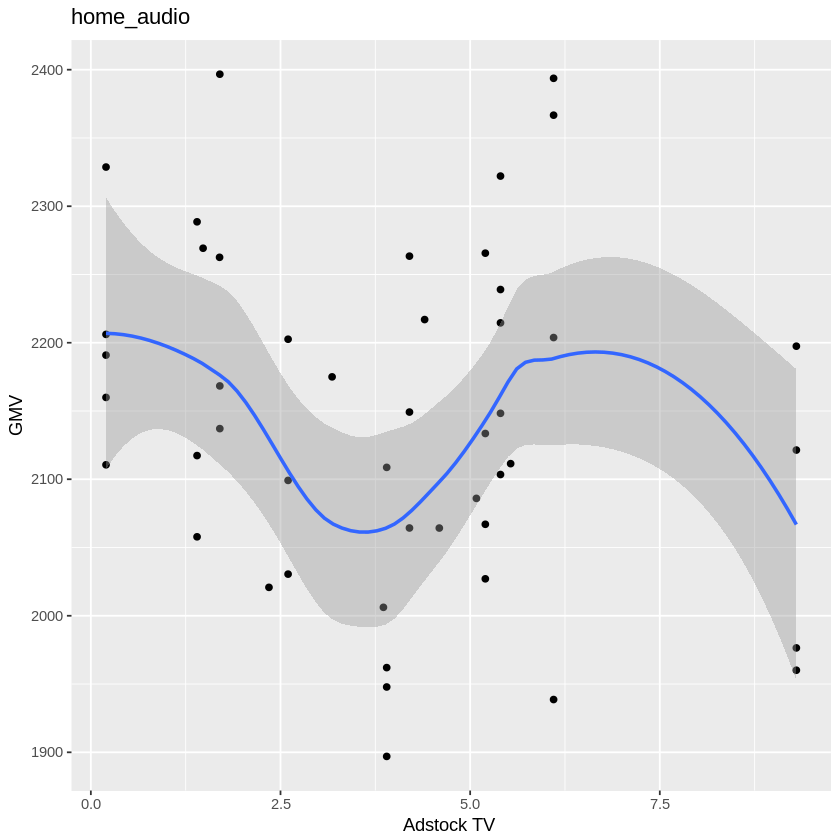

`geom_smooth()` using method = 'loess'


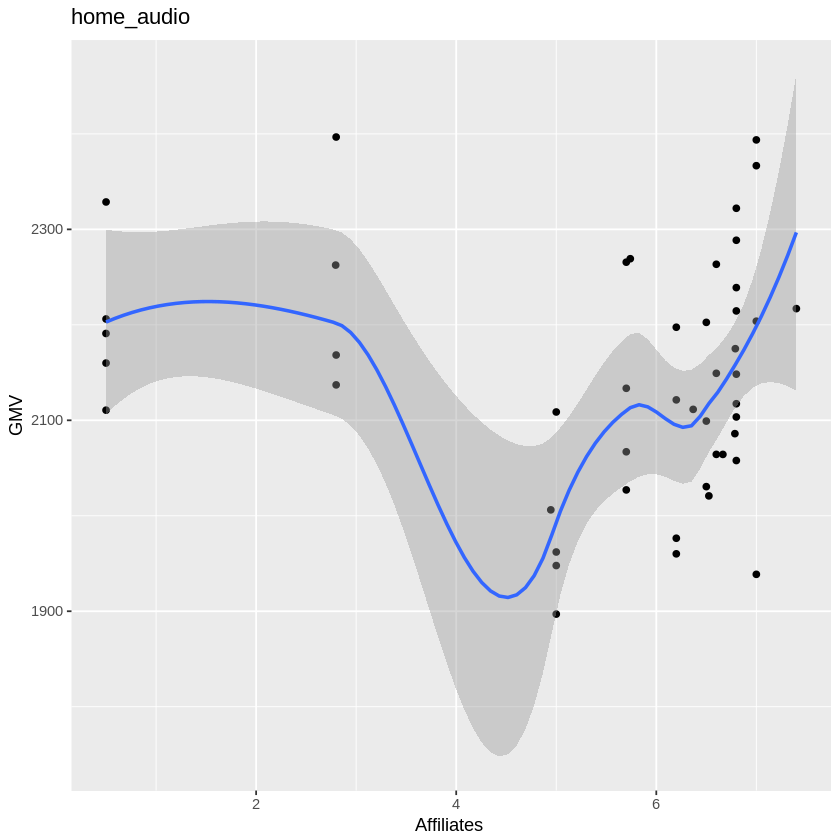

`geom_smooth()` using method = 'loess'


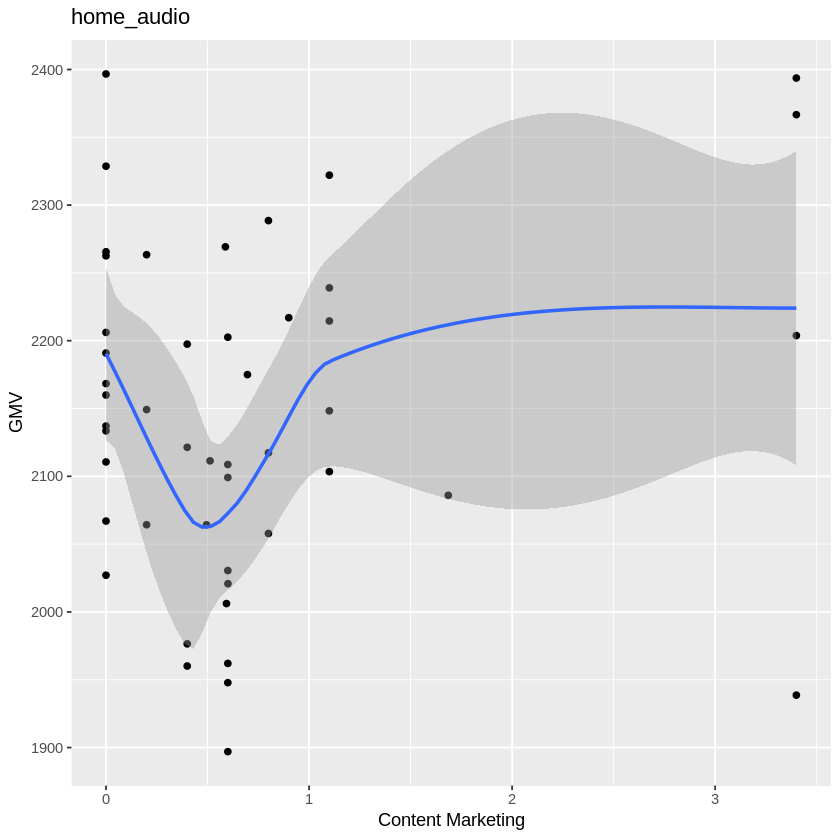

`geom_smooth()` using method = 'loess'


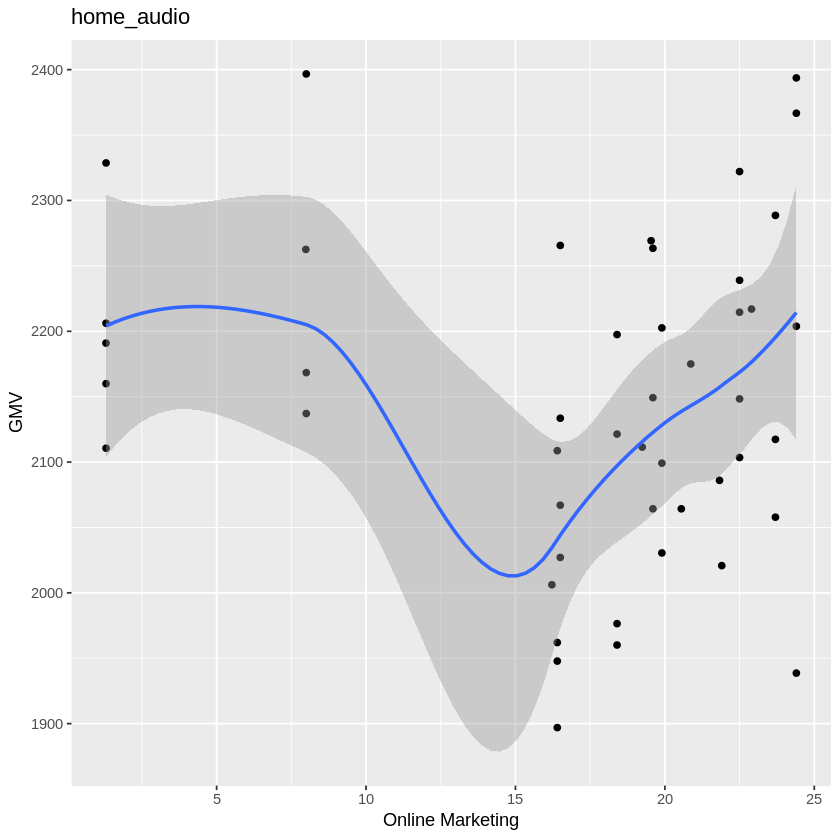

`geom_smooth()` using method = 'loess'


[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]


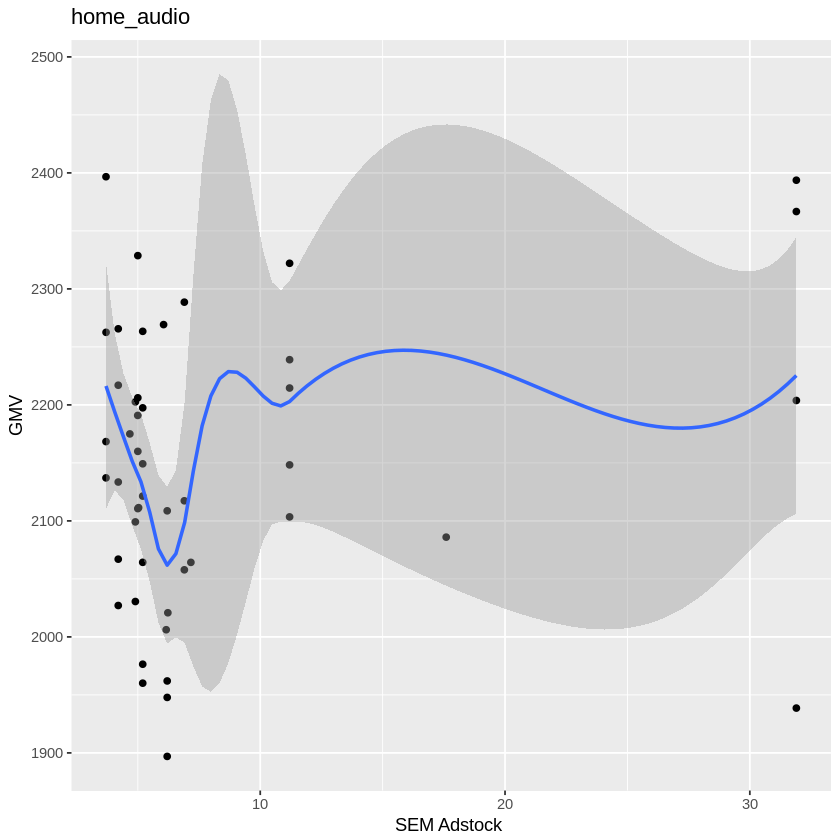

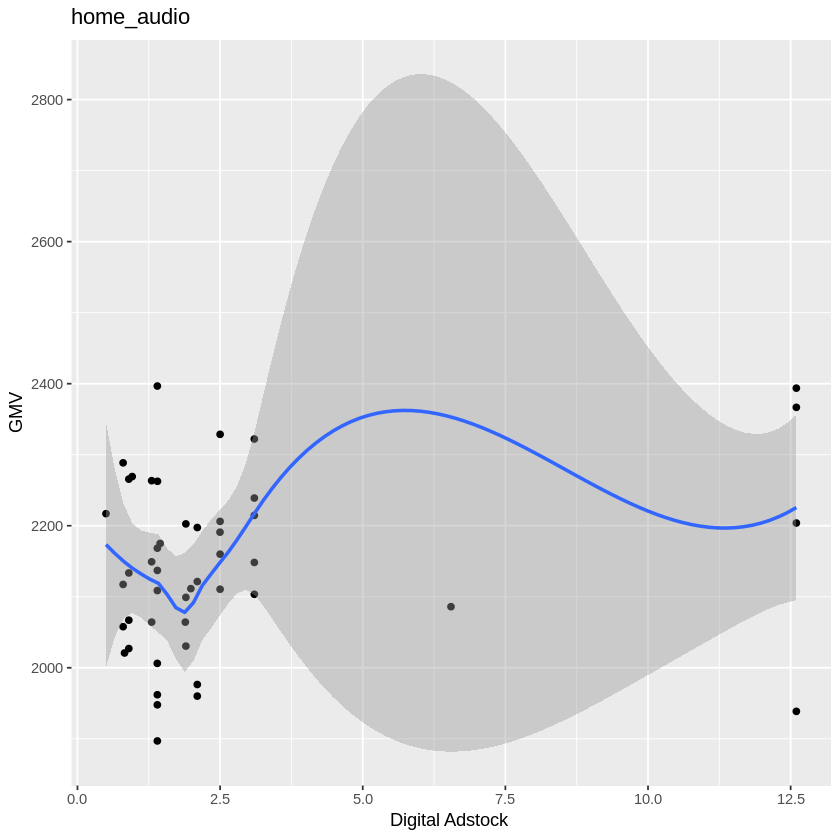

In [15]:
plots_home_audio <- eda(home_audio_final,'home_audio')
plots_home_audio

`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


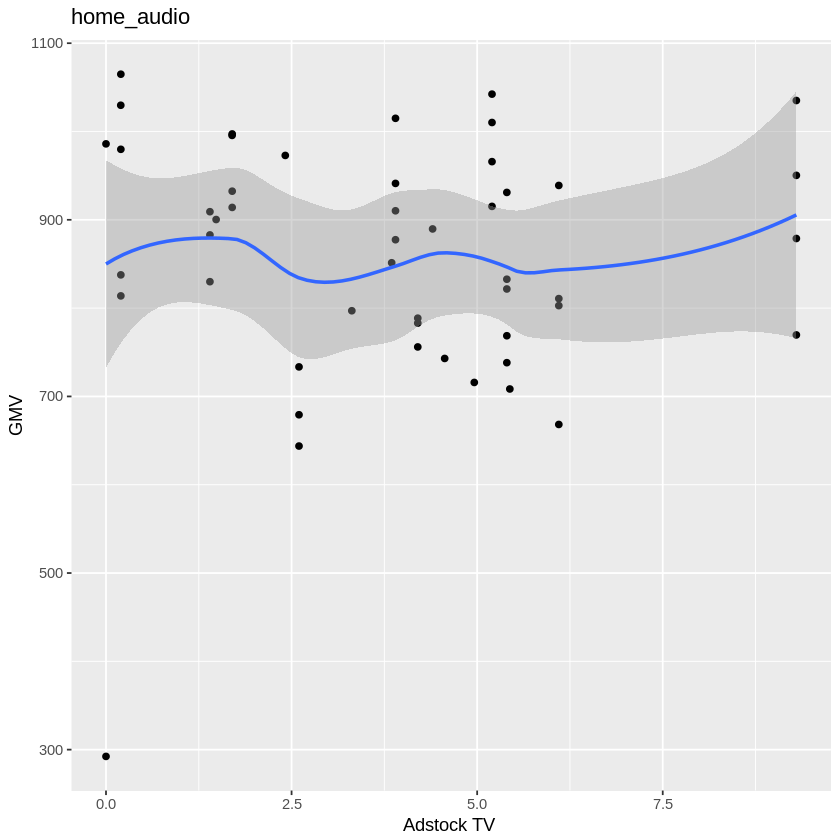

`geom_smooth()` using method = 'loess'


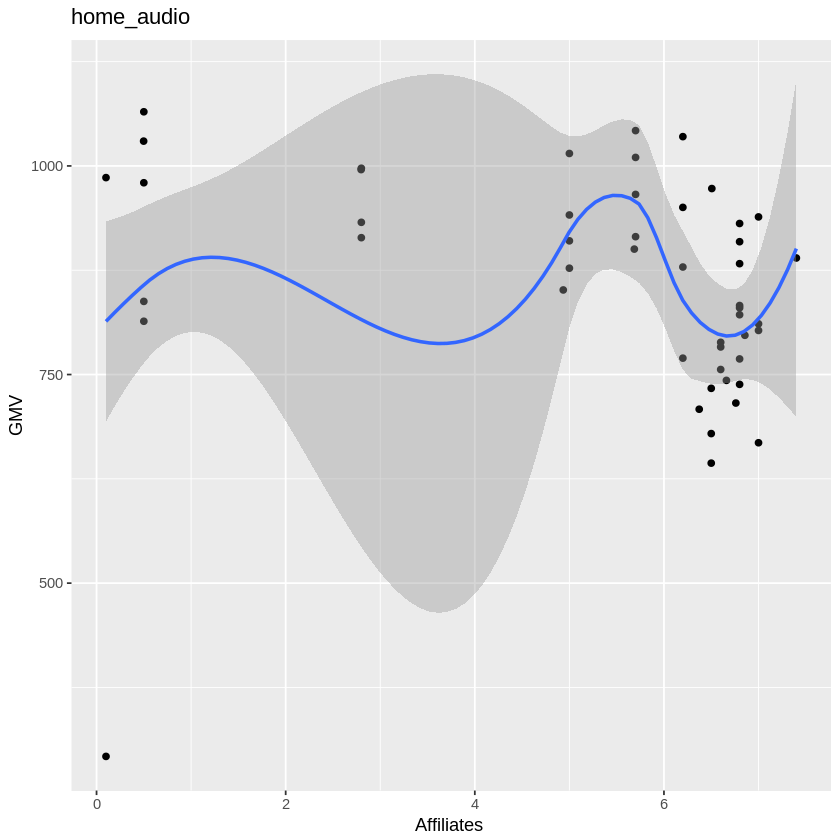

`geom_smooth()` using method = 'loess'


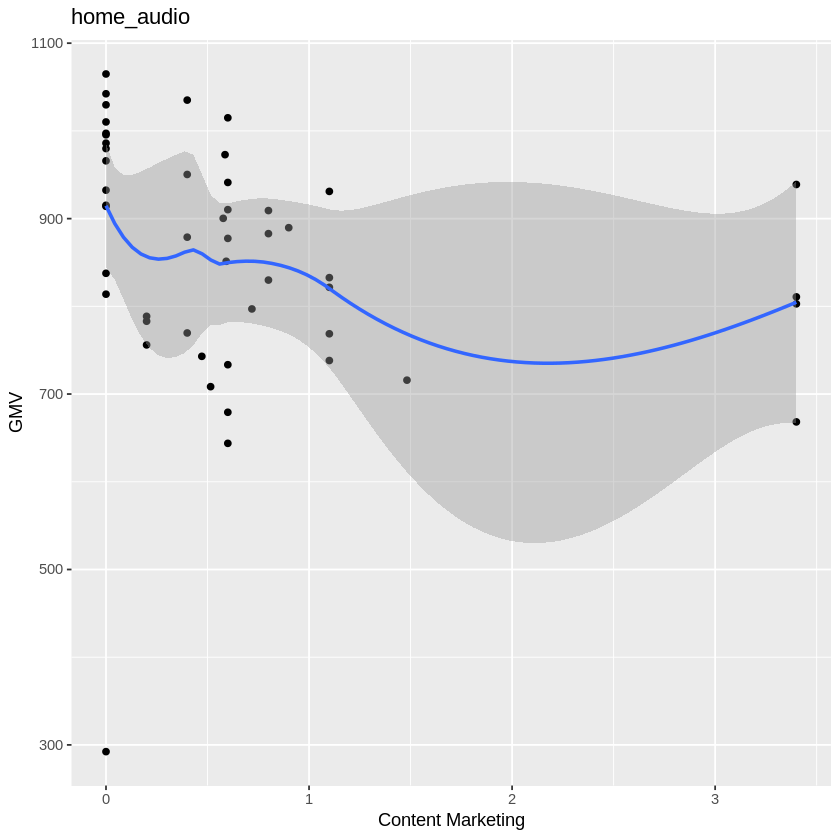

`geom_smooth()` using method = 'loess'


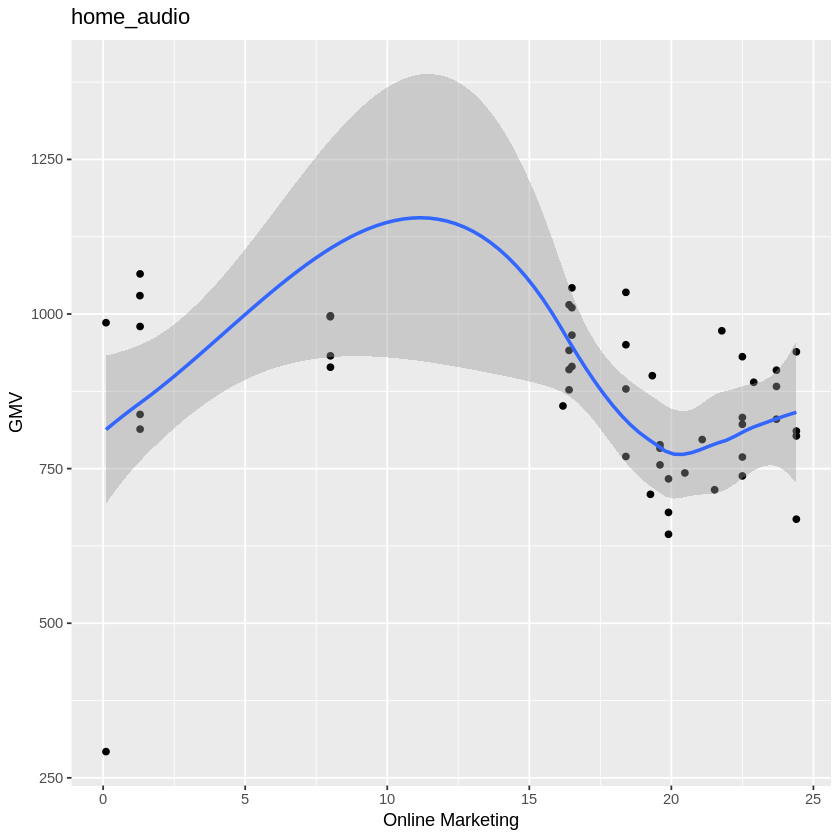

`geom_smooth()` using method = 'loess'


[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]


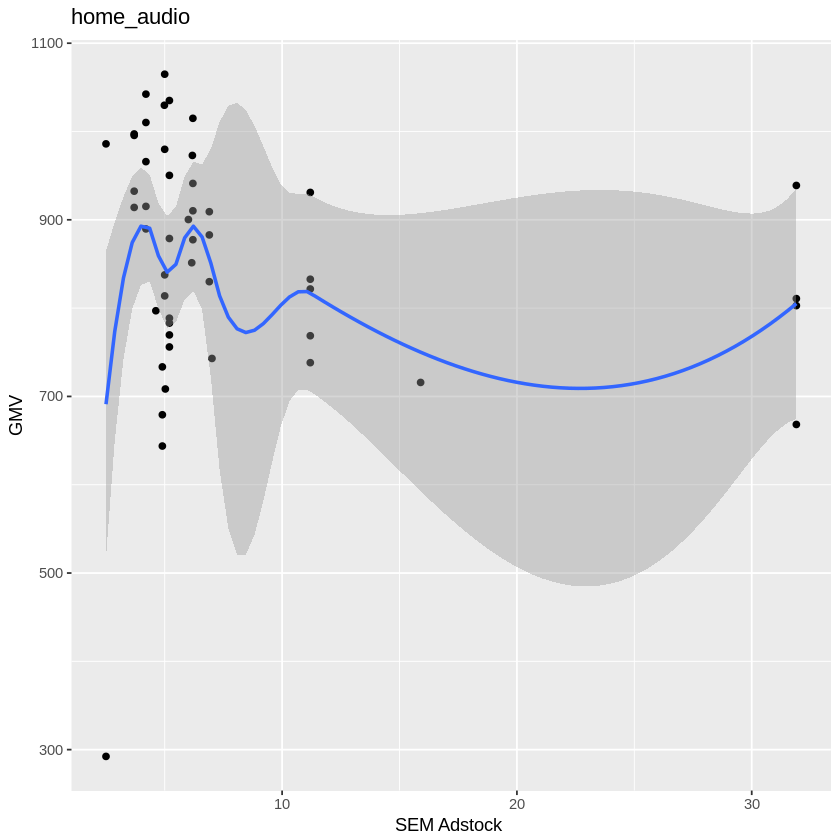

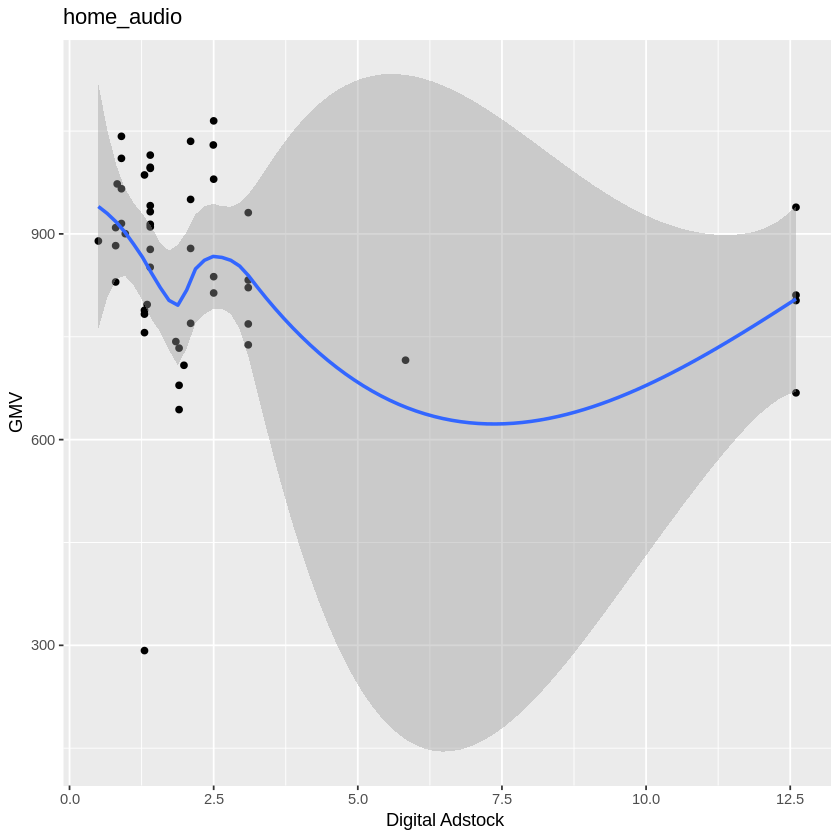

In [16]:
plots_gaming_accesory <- eda(gaming_accesory_final,'home_audio')
plots_gaming_accesory

`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


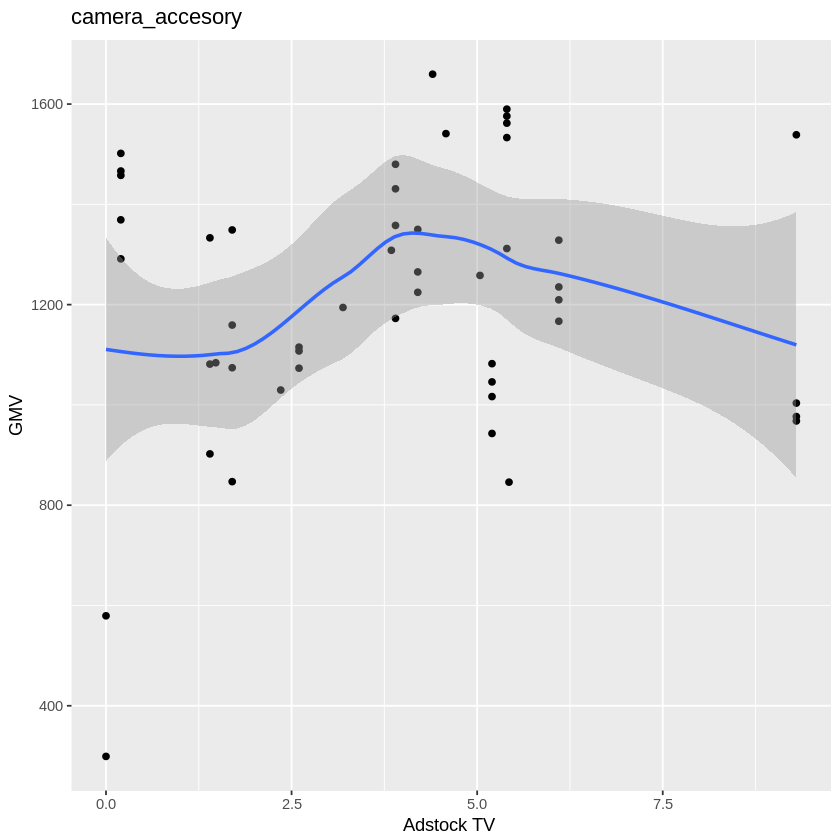

`geom_smooth()` using method = 'loess'


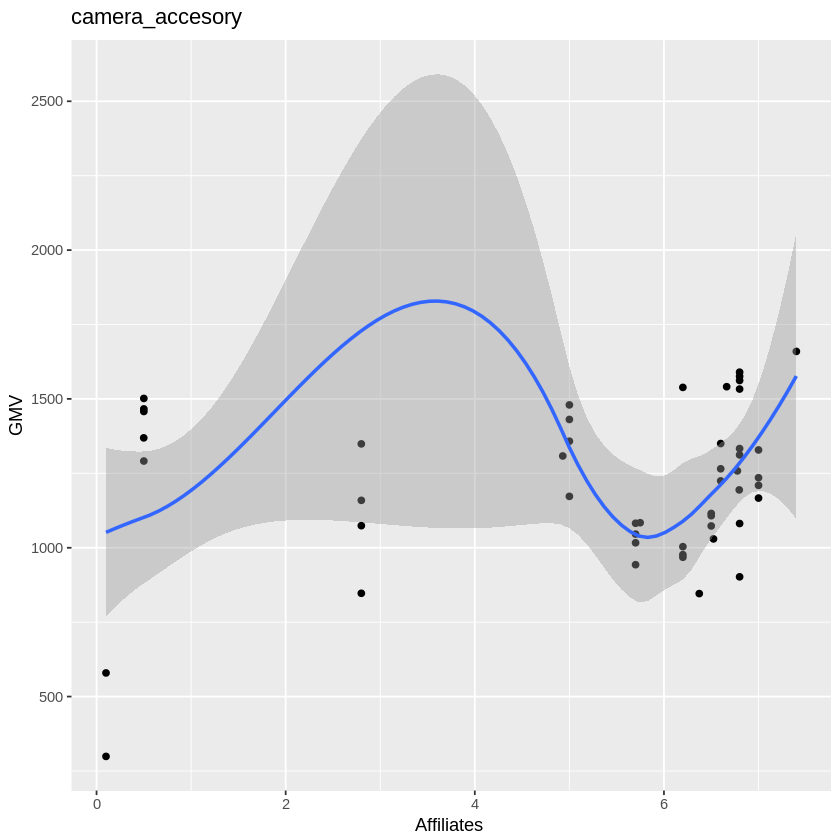

`geom_smooth()` using method = 'loess'


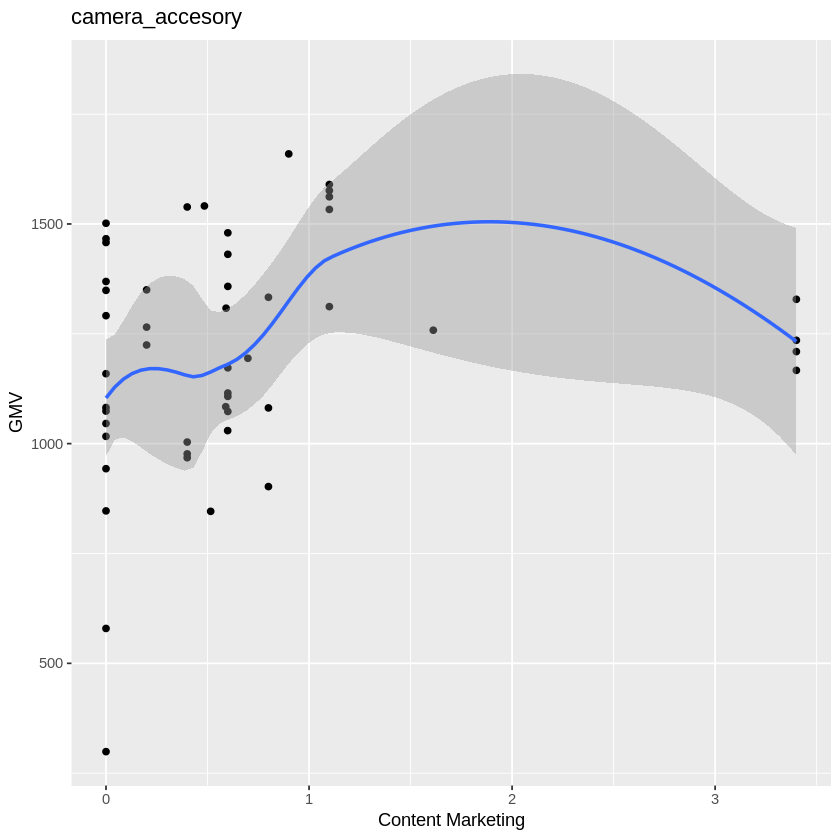

`geom_smooth()` using method = 'loess'


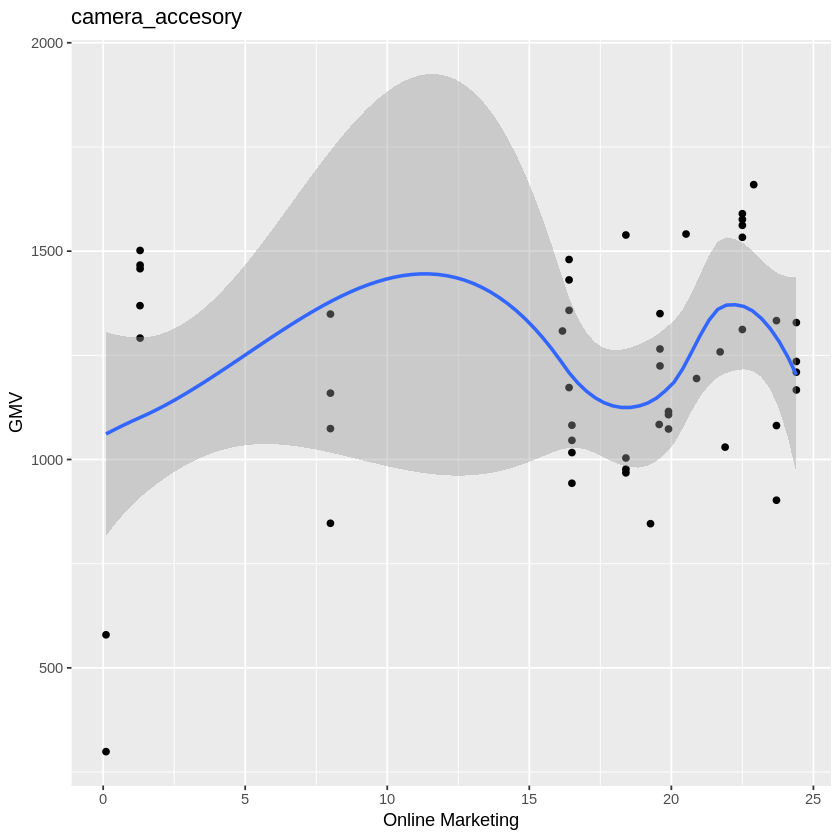

`geom_smooth()` using method = 'loess'


[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]


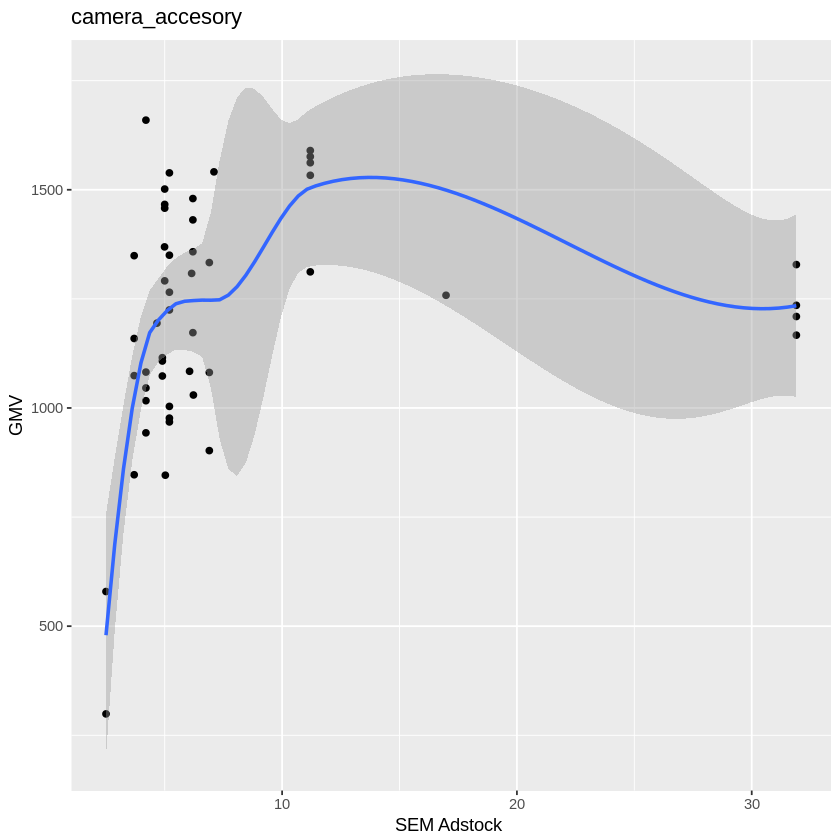

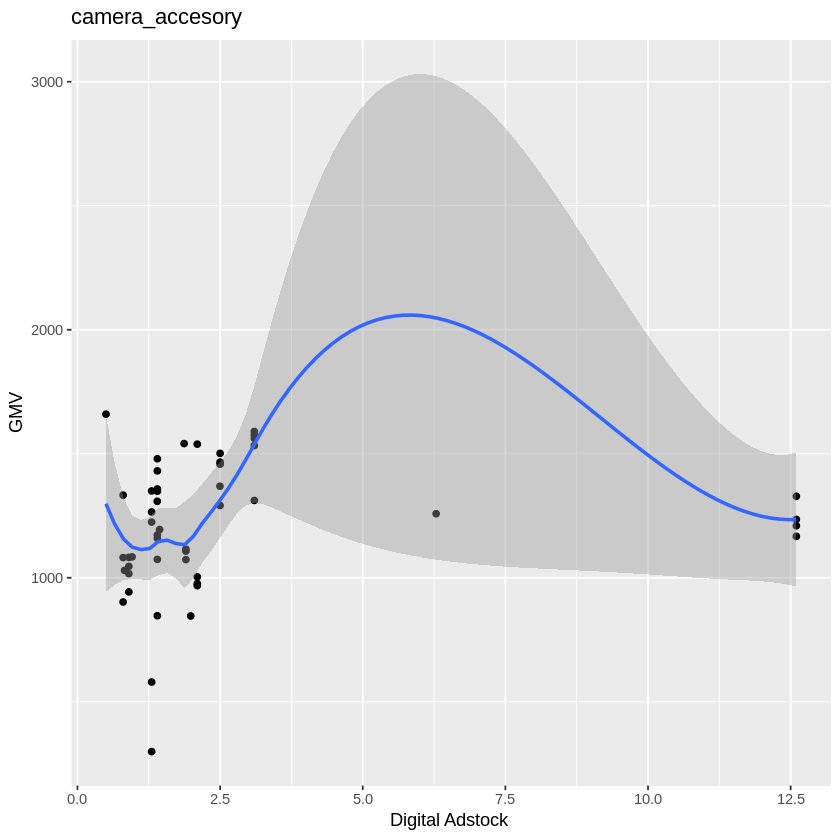

In [17]:
plots_camera_accesory <- eda(camera_accesory_final,'camera_accesory')
plots_camera_accesory

#### Writing the Files

In [18]:
write.csv(camera_accesory_final,'camera_accesory_final',row.names=F)

In [19]:
write.csv(home_audio_final,'home_audio_final',row.names=F)

In [20]:
write.csv(gaming_accesory_final,'gaming_accesory_final',row.names=F)